In [348]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import math

Функция суммы cos с тремя разными частотами

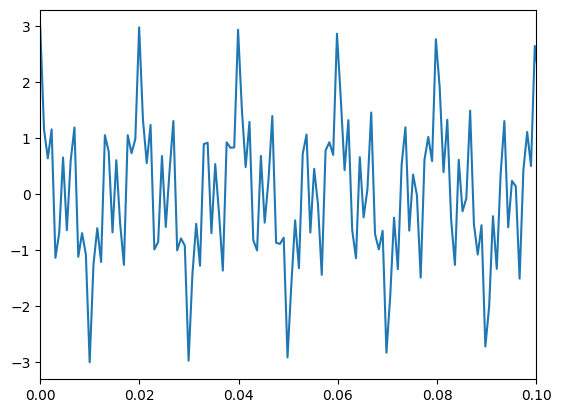

In [349]:
f_cos = 50
w = [(3**i)*2*np.pi*f_cos for i in range(3)]
t0 = 0
t1 = 4*np.pi
num_point = np.power(2, 14)
t_cos = np.linspace(t0, t1, num_point)
y_cos = sum(np.cos(w[i]*t_cos) for i in range(3))
plt.plot(t_cos, y_cos)
plt.xlim(0, 0.1)
plt.show()

Спектр сигнала суммы косинусов

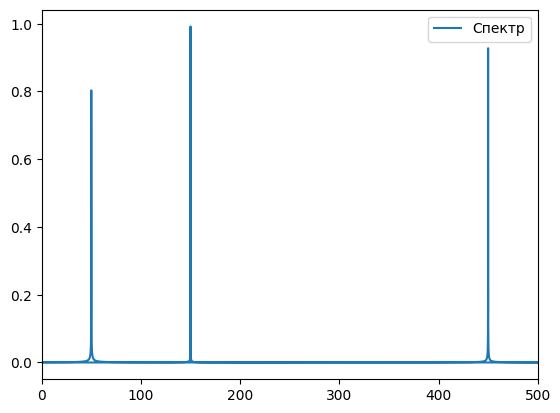

In [350]:
y_fft = np.fft.fft(y_cos)
freq_cos = np.fft.fftfreq(len(t_cos), d=(t_cos[1]-t_cos[0]))
plt.plot(freq_cos, np.abs(y_fft) / num_point * 2, label = "Спектр")
plt.xlim(0, 500)
plt.legend()
plt.show()

Функция фильтра Баттерворта

In [351]:
def print_filter(my_filter, wc):
    w = np.linspace(0, 500, 10000)
    plt.plot(w, my_filter(w, wc), label = "График фильтра Баттерворта")
    plt.grid()
    plt.xlim(0, 500)
    plt.legend()
    plt.show()

Отфильтрованный спектр

In [352]:
def print_spectr(my_filter, wc):
    freq_cos = np.fft.fftfreq(len(t_cos), d=(t_cos[1]-t_cos[0]))
    if my_filter!=None:
        y_fft_H = y_fft*my_filter(freq_cos, wc)
    plt.plot(freq_cos, np.abs(y_fft_H) / num_point * 2, label = "Спектр")
    plt.xlim(0, 500)
    plt.ylim(0, 1)
    plt.legend()
    plt.show()
    return y_fft_H 

In [353]:
def print_ifft(y_fft):
    y_fft_H = y_fft
    yH = np.fft.ifft(y_fft_H)
    plt.plot(t_cos, yH, label = "Отфильтрованный график")
    plt.xlim(0, 0.1)
    plt.legend()
    plt.show()

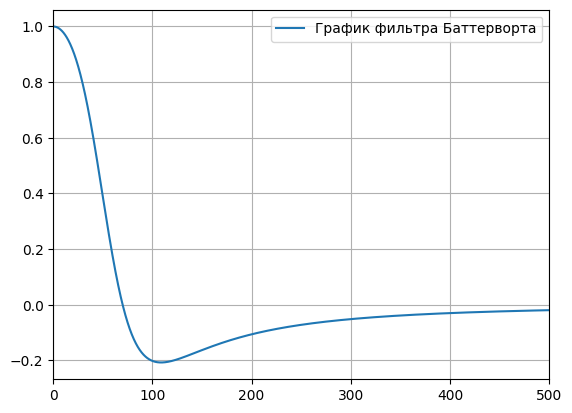

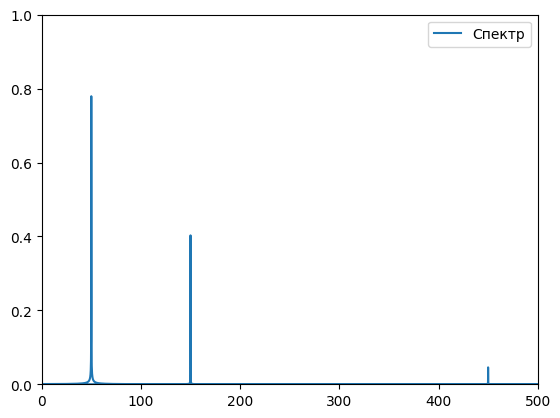

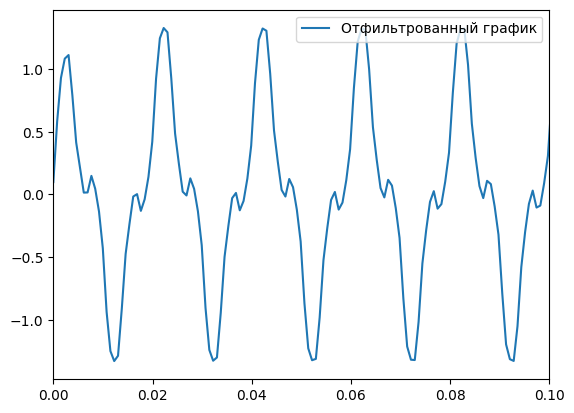

In [354]:
 def H_v(w, wc):
    return (wc**2) / (-(w**2) + 1j * np.sqrt(2) * wc * w + (wc**2))
print_filter(H_v, wc= 70)
my_y_fft = print_spectr(H_v, wc=100)
print_ifft(my_y_fft)

График отфильтрованного сигнала сумм косинусов разных частот

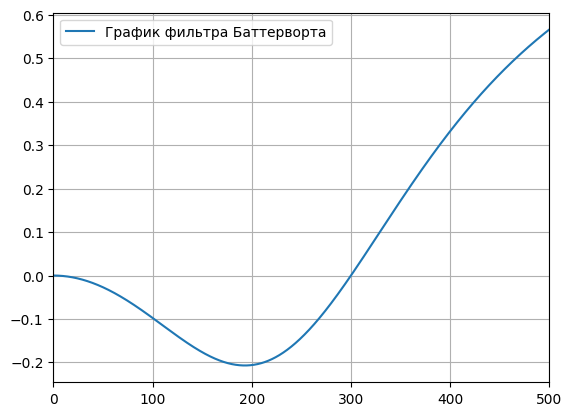

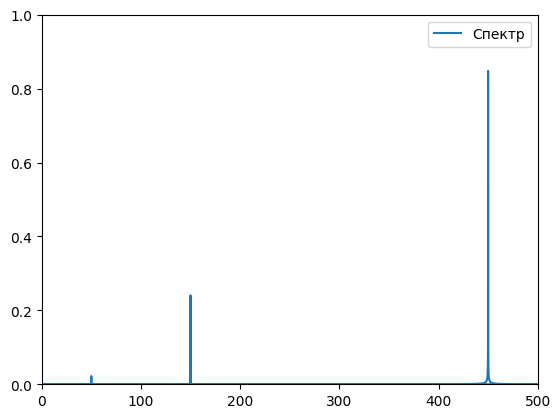

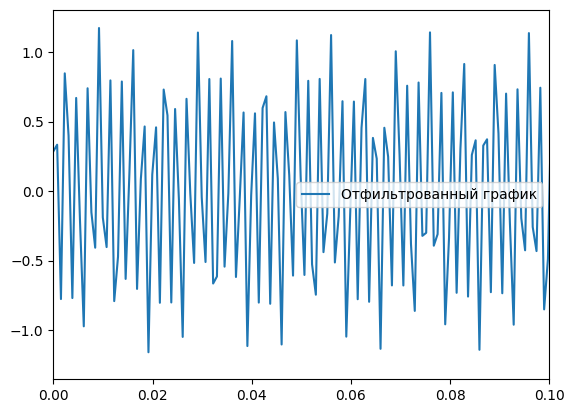

In [355]:
def H_n(w, wc):
    return (w**2 / (-(wc**2) + (1j) * np.sqrt(2) * wc * w + w**2))

print_filter(H_n, wc=300)
my_y_fft = print_spectr(H_n, wc=300)
print_ifft(my_y_fft)

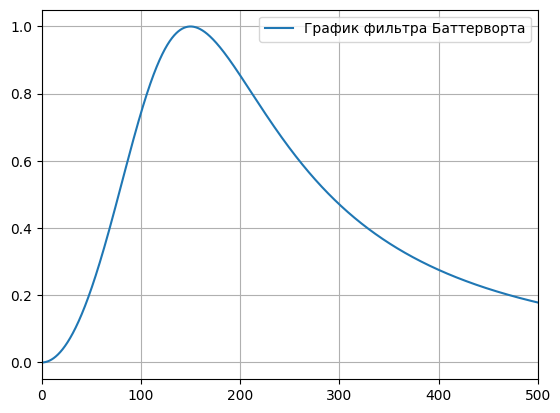

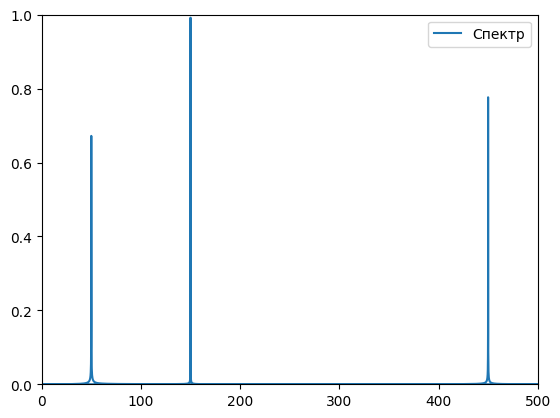

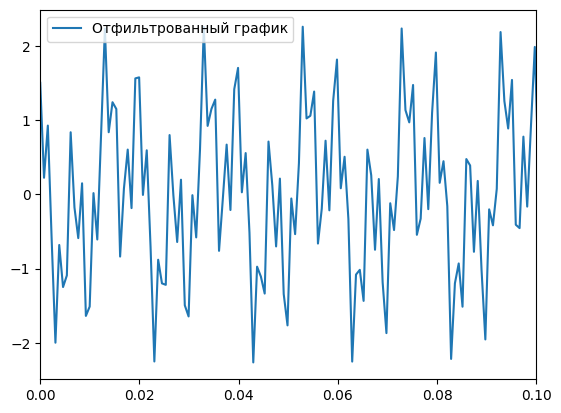

In [356]:
def H_p(w, wc):
    return 1 - (H_v(w, wc)-H_n(w, wc))**2

print_filter(H_p, wc=150)
my_y_fft = print_spectr(H_p, wc=150)
print_ifft(my_y_fft)

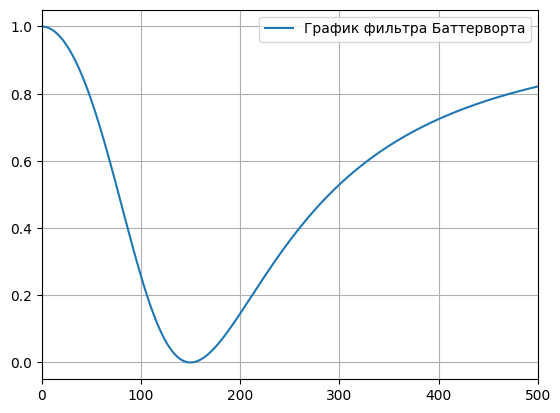

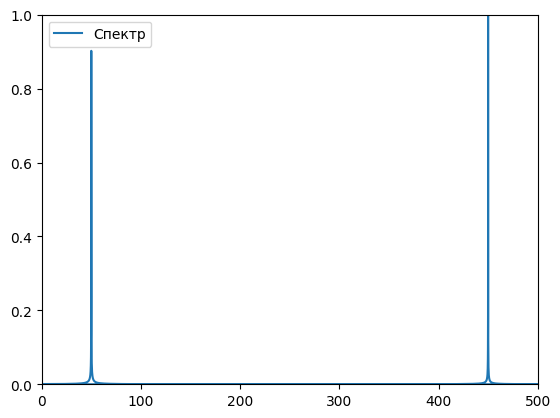

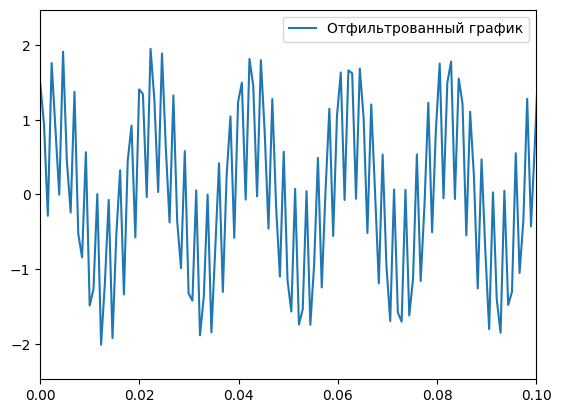

In [357]:
def H_z(w, wc):
    return (H_v(w, wc)-H_n(w, wc))**2

print_filter(H_z, wc=150)
my_y_fft = print_spectr(H_z, wc=150)
print_ifft(my_y_fft)

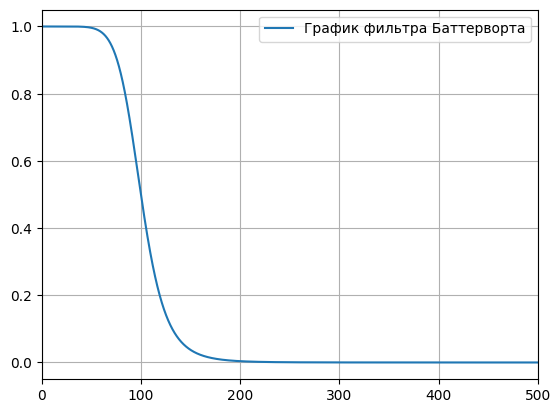

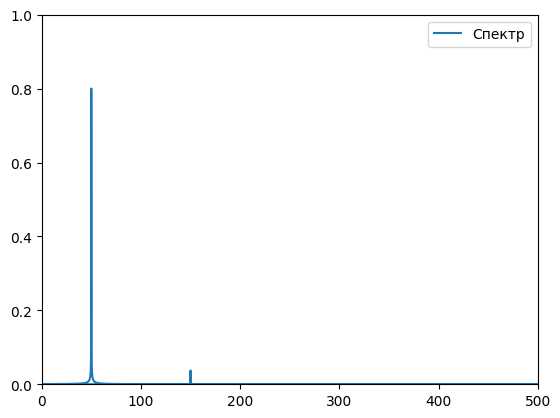

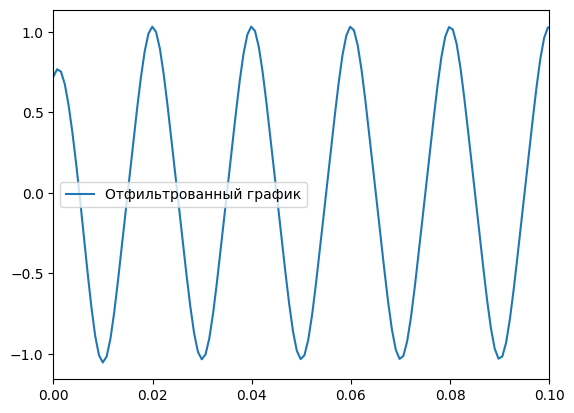

In [358]:
def H(S, wc, n):
    S = S/wc
    return 1/((-1)**(n) * S**(2*n) + 1)
fH4 = lambda w, wc: H(w, wc, 4)

print_filter(fH4, wc=100)
my_y_fft = print_spectr(fH4, wc=100)
print_ifft(my_y_fft)

In [359]:
def add_noise(y):
    noise = np.random.normal(0, 0.2, y.shape)
    return y + noise

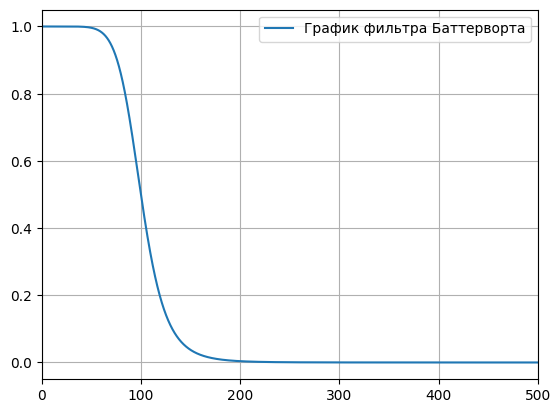

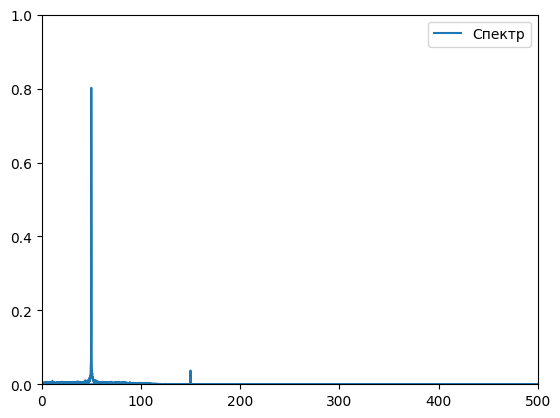

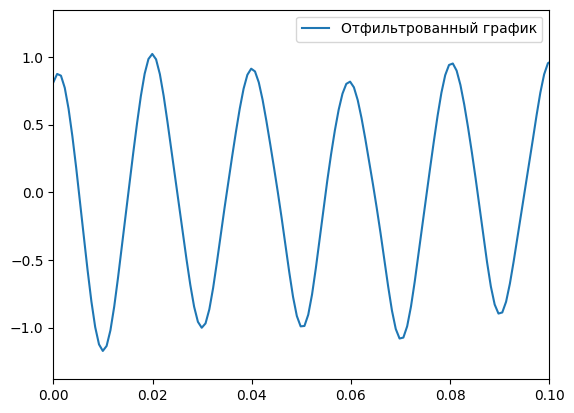

In [363]:
print_filter(fH4, wc=100)
y_fft = np.fft.fft(add_noise(y_cos))
my_y_fft = print_spectr(fH4, wc=100)
print_ifft(my_y_fft)

In [361]:
#Фильтр Чебышева

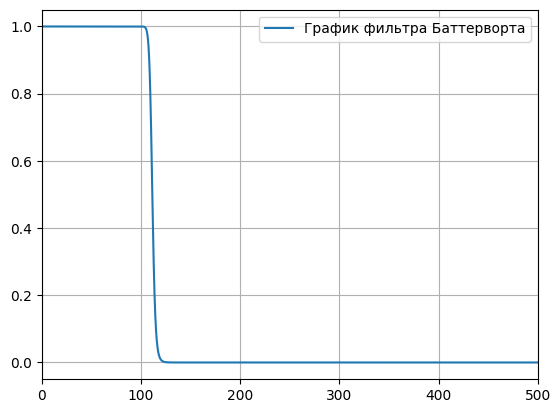

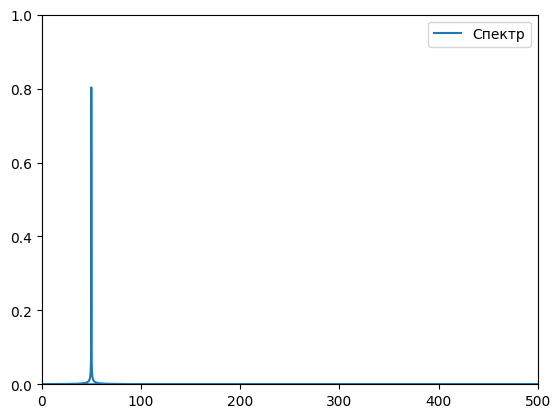

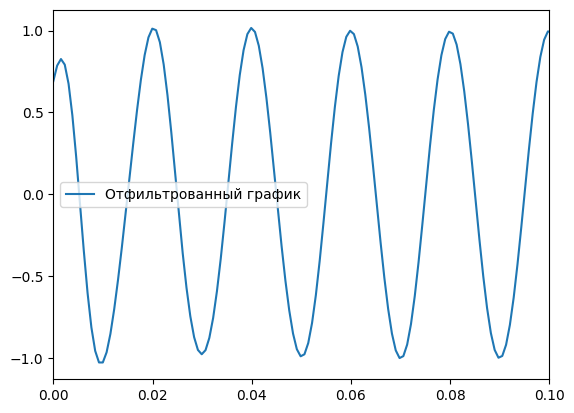

In [362]:
from scipy.special import eval_chebyt

def chebyshev_filter(w, eps, w_p, A, w_s):
    N = int(np.log(eps/np.sqrt(A**2 - 1))/np.log(w_p/w_s))
    return 1/(1+(eps**2)*eval_chebyt(N, w/w_p)**2)

# Пример использования:
CH = lambda w, wc: chebyshev_filter(w, eps=0.001, w_p=100, A=100, w_s=200)

wc=1
print_filter(CH, wc)
y_fft = np.fft.fft(y_cos)
my_y_fft = print_spectr(CH, wc)
print_ifft(my_y_fft)